### **Задание №1**. Предположим, что у вас в базе есть табличка с балансом по всем счетам клиента на конец дня. Из-за особенностей построения таблицы, часть значений незаполнена и физически это означает отсутствие информации об изменении баланса. Для простоты будем считать, пропущенные значения для одного пользователя не могут встретиться между двумя заполненными. Напишите SQL запрос для заполнения неизвестных значений по каждому клиенту последним известным.

client_id |date | value
--- | --- | ---
1 | 14.04.2020 | 10000
1 | 15.04.2020 | 5000
1 | 16.04.2020 | NaN
1 | 17.04.2020 | NaN
1 | 18.04.2020 | NaN
2 | 14.04.2020 | 250000
2 | 15.04.2020 | 250000
2 | 16.04.2020 | 230000
2 | 17.04.2020 | 230000
2 | 18.04.2020 | 225000
3 | 14.04.2020 | 50000
3 | 15.04.2020 | NaN
3 | 16.04.2020 | NaN
3 | 17.04.2020 | NaN
3 | 18.04.2020 | NaN


In [ ]:
# <YOUR_CODE_HERE>

select
  client_id,date,
  case when value is null then
    (select value
     from sb t2 
     where value is not null and t2.client_id=t1.client_id
	 order by date DESC
     limit 1)
  else value end as value
from
  sb t1;

### **Задание №1.1 (*)**. В прошлом задании мы считали, что пропущенные значения не могут находиться между двумя заполненными в рамках одного пользователя, что не всегда правда в реальных задачах. Напишите теперь SQL запрос без указанного допущения.

client_id |date | value
--- | --- | ---
1 | 14.04.2020 | 10000
1 | 15.04.2020 | 5000
1 | 16.04.2020 | NaN
1 | 17.04.2020 | 7000
1 | 18.04.2020 | NaN
2 | 14.04.2020 | 250000
2 | 15.04.2020 | 250000
2 | 16.04.2020 | 230000
2 | 17.04.2020 | 230000
2 | 18.04.2020 | 225000
3 | 14.04.2020 | 50000
3 | 15.04.2020 | NaN
3 | 16.04.2020 | NaN
3 | 17.04.2020 | 49000
3 | 18.04.2020 | NaN

In [ ]:
# <YOUR_CODE_HERE>

select
  client_id,date,
  case when value is null then
    (select value
     from sb2 t2 
     where value is not null and t2.date < t1.date and t2.client_id=t1.client_id
	 order by date DESC
     limit 1)
  else value end as value
from
  sb2 t1;

### **Задание №2**. Пусть клиенты обладают рядом статусов, закодированных цифрами: 0 - "улица", 1 - "зарплатник", 2 - "премиум", 3 - "пенсионер", 4 - "студент". У нас есть матрица с логами смен статусов за некоторый период, разверните ее в матрицу статус - статус с частотами перехода между ними.

Пример, как было:

client_id | prev_segment | new_segment|
--- | --- | ---
1 | 0 | 1
2 | 0 | 2
3 | 4 | 3

Пример, как нужно:

segment |0 | 1 | 2 | 3 | 4 
--- | --- | --- | --- | --- | ---
0 | 0 | 0.5 | 0.5 | 0 | 0 
1 | 0 |0 | 0 | 0 | 0
2 | 0 | 0 | 0 | 0 | 0
3 | 0 | 0 | 0 | 0 | 0
4 | 0 | 0 | 0 | 1 | 0

В процессе выполнения задания разрешается пользоваться библиотеками numpy и pandas.

In [ ]:
import numpy as np
import pandas as pd

# Сгенерируем данные для задачи
data = pd.DataFrame(
    np.random.randint(low=0, high=4, size=(50000000, 2)),
    columns=['prev_segment', 'new_segment']
)

# <YOUR_CODE_HERE>

data.groupby('prev_segment')['new_segment'].value_counts(normalize=True).unstack()

new_segment,0,1,2,3
prev_segment,,,,
0,0.250135,0.250051,0.249901,0.249913
1,0.249922,0.249927,0.250034,0.250117
2,0.249922,0.250069,0.250044,0.249965
3,0.250003,0.249943,0.249977,0.250077


### **Задание №2.1 (*)**. Если вы не пользовались библиотечными функциями и реализовывали алгоритм самостоятельно, напишите, пожалуйста, его асимптотическую сложность в терминах O-большое.

In [ ]:
# <YOUR_CODE_HERE>

### **Задание №3**. Постройте прогнозую модель для датасета с UCI Machine Learning: предобработайте категориальные фичи, отберите их, соберите схему валидации и отберите модели с помощью нее. Описание датасета по ссылке: https://archive.ics.uci.edu/ml/datasets/Drug+consumption+%28quantified%29

Данная задача multilabel multiclass classification, поэтому предлагаю начать с одного из подходов:
- Свести задачу к multilabel binary classification, как это указано в описании к датасету;
- Свести задачку к binary classification тем или иным способом;
- Обучить множество multiclass/binary classification моделей;
- Что-то еще, что придет в голову.


In [ ]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/00373/drug_consumption.data

--2022-01-21 12:25:12--  https://archive.ics.uci.edu/ml/machine-learning-databases/00373/drug_consumption.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 346695 (339K) [application/x-httpd-php]
Saving to: ‘drug_consumption.data.1’

drug_consumption.da 100%[===================>] 338.57K  1.28MB/s    in 0.3s    

2022-01-21 12:25:12 (1.28 MB/s) - ‘drug_consumption.data.1’ saved [346695/346695]



In [ ]:
!pip install catboost

In [ ]:
import numpy as np
import pandas as pd

from sklearn.multioutput import MultiOutputClassifier
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import roc_curve, roc_auc_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv('drug_consumption.data', header=None, index_col=0)
data.head()

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31
0,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,0.49788,0.48246,-0.05921,0.96082,0.12600,0.31287,-0.57545,-0.58331,-0.91699,-0.00665,-0.21712,-1.18084,CL5,CL2,CL0,CL2,CL6,CL0,CL5,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL2,CL0,CL0
2,-0.07854,-0.48246,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,-0.14277,-0.71126,-0.21575,CL5,CL2,CL2,CL0,CL6,CL4,CL6,CL3,CL0,CL4,CL0,CL2,CL0,CL2,CL3,CL0,CL4,CL0,CL0
3,0.49788,-0.48246,-0.05921,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,-1.37983,0.40148,CL6,CL0,CL0,CL0,CL6,CL3,CL4,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL1,CL0,CL0,CL0
4,-0.95197,0.48246,1.16365,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,0.58489,-1.37983,-1.18084,CL4,CL0,CL0,CL3,CL5,CL2,CL4,CL2,CL0,CL0,CL0,CL2,CL0,CL0,CL0,CL0,CL2,CL0,CL0
5,0.49788,0.48246,1.98437,0.96082,-0.31685,0.73545,-1.63340,-0.45174,-0.30172,1.30612,-0.21712,-0.21575,CL4,CL1,CL1,CL0,CL6,CL3,CL6,CL0,CL0,CL1,CL0,CL0,CL1,CL0,CL0,CL2,CL2,CL0,CL0


In [ ]:
data.shape

(1885, 31)

In [ ]:
# <YOUR_CODE_HERE>

# переименуем столбцы
demographic_columns = ['Age', 'Gender', 'Education', 'Country','Ethnicity']

personality_columns = ['Neuroticism','Extraversion','Openness to experience','Agreeableness',
    'Conscientiousness','Impulsiveness', 'Sensation seeing']

drugs_columns = ['Alcohol consumption','Amphetamines consumption','Amyl nitrite consumption',
    'Benzodiazepine consumption','Caffeine consumption','Cannabis consumption',
    'Chocolate consumption','Cocaine consumption','Crack consumption',
    'Ecstasy consumption','Heroin consumption','Ketamine consumption',
    'Legal highs consumption','Lysergic acid diethylamide consumption','Methadone consumption',
    'Magic mushrooms consumption','Nicotine consumption','Fictitious drug Semeron consumption',
    'Volatile substance abuse consumption']

data.columns = demographic_columns + personality_columns + drugs_columns
data.head()

,Age,Gender,Education,Country,Ethnicity,Neuroticism,Extraversion,Openness to experience,Agreeableness,Conscientiousness,Impulsiveness,Sensation seeing,Alcohol consumption,Amphetamines consumption,Amyl nitrite consumption,Benzodiazepine consumption,Caffeine consumption,Cannabis consumption,Chocolate consumption,Cocaine consumption,Crack consumption,Ecstasy consumption,Heroin consumption,Ketamine consumption,Legal highs consumption,Lysergic acid diethylamide consumption,Methadone consumption,Magic mushrooms consumption,Nicotine consumption,Fictitious drug Semeron consumption,Volatile substance abuse consumption
0,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,0.49788,0.48246,-0.05921,0.96082,0.12600,0.31287,-0.57545,-0.58331,-0.91699,-0.00665,-0.21712,-1.18084,CL5,CL2,CL0,CL2,CL6,CL0,CL5,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL2,CL0,CL0
2,-0.07854,-0.48246,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,-0.14277,-0.71126,-0.21575,CL5,CL2,CL2,CL0,CL6,CL4,CL6,CL3,CL0,CL4,CL0,CL2,CL0,CL2,CL3,CL0,CL4,CL0,CL0
3,0.49788,-0.48246,-0.05921,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,-1.37983,0.40148,CL6,CL0,CL0,CL0,CL6,CL3,CL4,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL1,CL0,CL0,CL0
4,-0.95197,0.48246,1.16365,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,0.58489,-1.37983,-1.18084,CL4,CL0,CL0,CL3,CL5,CL2,CL4,CL2,CL0,CL0,CL0,CL2,CL0,CL0,CL0,CL0,CL2,CL0,CL0
5,0.49788,0.48246,1.98437,0.96082,-0.31685,0.73545,-1.63340,-0.45174,-0.30172,1.30612,-0.21712,-0.21575,CL4,CL1,CL1,CL0,CL6,CL3,CL6,CL0,CL0,CL1,CL0,CL0,CL1,CL0,CL0,CL2,CL2,CL0,CL0


In [ ]:
# типы данных
data.dtypes

Age                                       float64
Gender                                    float64
Education                                 float64
Country                                   float64
Ethnicity                                 float64
Neuroticism                               float64
Extraversion                              float64
Openness to experience                    float64
Agreeableness                             float64
Conscientiousness                         float64
Impulsiveness                             float64
Sensation seeing                          float64
Alcohol consumption                        object
Amphetamines consumption                   object
Amyl nitrite consumption                   object
Benzodiazepine consumption                 object
Caffeine consumption                       object
Cannabis consumption                       object
Chocolate consumption                      object
Cocaine consumption                        object


In [ ]:
# пропуски
data.isna().sum()

Age                                       0
Gender                                    0
Education                                 0
Country                                   0
Ethnicity                                 0
Neuroticism                               0
Extraversion                              0
Openness to experience                    0
Agreeableness                             0
Conscientiousness                         0
Impulsiveness                             0
Sensation seeing                          0
Alcohol consumption                       0
Amphetamines consumption                  0
Amyl nitrite consumption                  0
Benzodiazepine consumption                0
Caffeine consumption                      0
Cannabis consumption                      0
Chocolate consumption                     0
Cocaine consumption                       0
Crack consumption                         0
Ecstasy consumption                       0
Heroin consumption              

In [ ]:
# уберем из датасета записи людей, которые соврали об употреблении фиктивного наркотика
data = data[data['Fictitious drug Semeron consumption']=='CL0']
data.shape
# восемь человек

(1877, 31)

In [ ]:
# удалим Fictitious drug Semeron consumption
data = data.drop(['Fictitious drug Semeron consumption'], axis=1)
drugs_columns.remove('Fictitious drug Semeron consumption')
data.shape

(1877, 30)

### **Распределение персональных показателей**

Text(0.5, 1.0, 'Распределение персональных показателей')

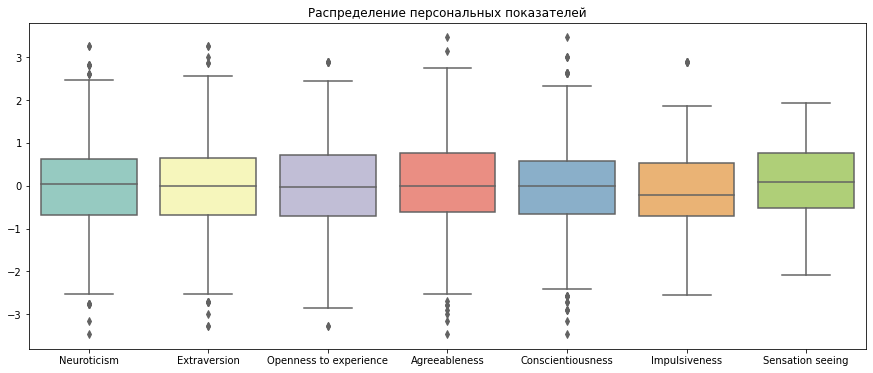

In [ ]:
import seaborn as sns

fig = plt.subplots(figsize=(15,6))
sns.boxplot(data = data[personality_columns], palette="Set3")
plt.title('Распределение персональных показателей')

### **Распределение классов пользоателей по препаратам**

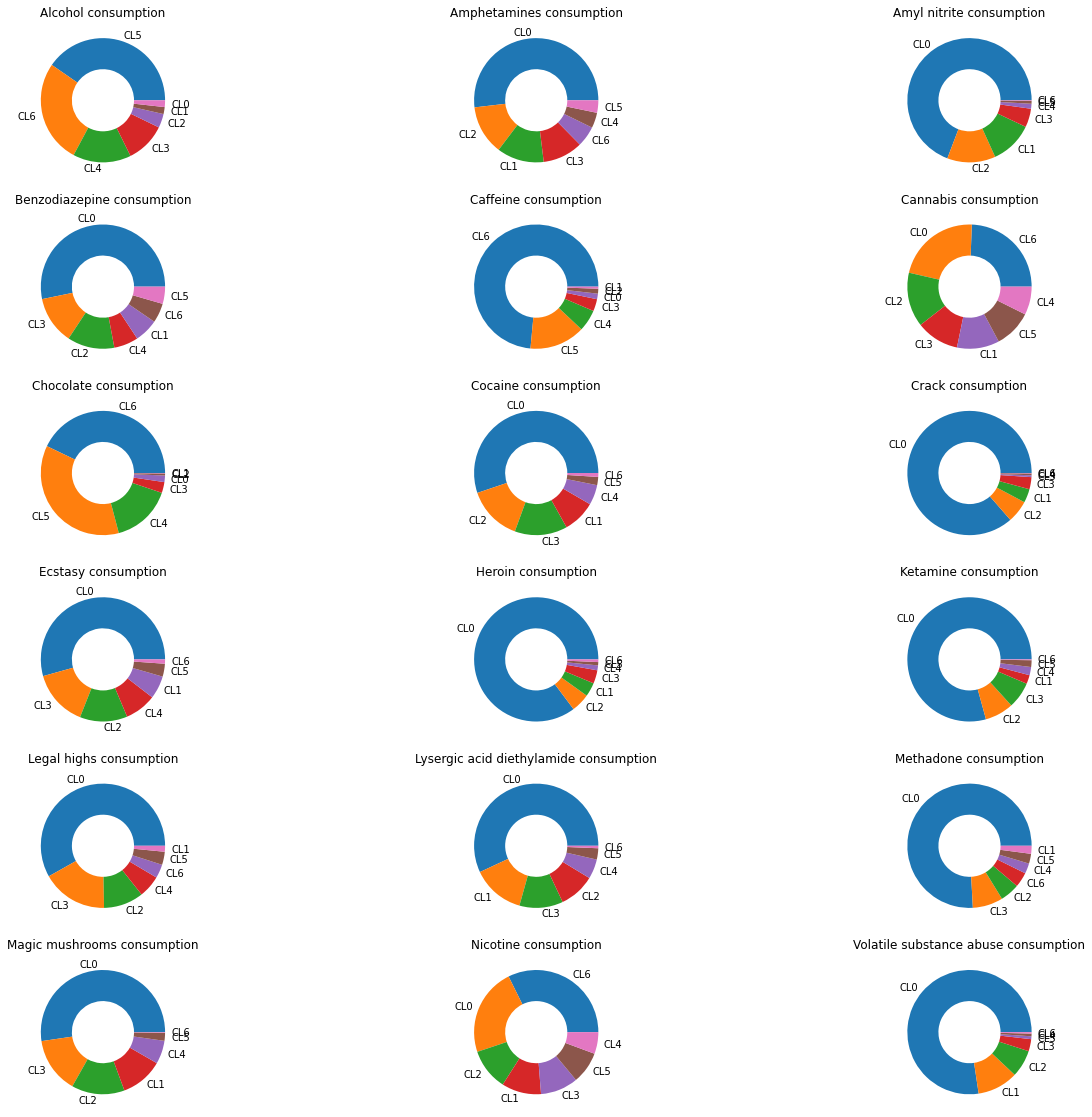

In [ ]:

fig, axes = plt.subplots(nrows = 6, ncols = 3, figsize=(22,20))
n = 0
m = 0
explode = [0.05, 0,0,0,0,0,0]

for i,j in enumerate(drugs_columns):
  if n <= 2:
      axes[m, n].pie(data[j].value_counts(), labels=data[j].value_counts().index, wedgeprops=dict(width=0.5))
      axes[m, n].set_title(j)
      n+=1
  else:
      n=0
      m += 1
      axes[m, n].pie(data[j].value_counts(), labels=data[j].value_counts().index, wedgeprops=dict(width=0.5))
      axes[m, n].set_title(j)
      n += 1

plt.show()

In [ ]:
# вспомогательные функции

def graph(fpr,tpr,auc_roc, name):
    fig, ax = plt.subplots(figsize=(8,8))

    ax.plot(fpr, tpr)
    # ROC-кривая случайной модели (выглядит как прямая)
    ax.plot([0, 1], [0, 1], linestyle='--')
    ax.set_xlim([0.0,1.0])
    ax.set_ylim([0.0,1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title(name)
    ax.grid(True)

    add_titlebox(ax=ax, text=f'AUC_ROC = {auc_roc.round(3)}',x=0.8,y=0.25)

    plt.show()
    
#функция для подписей на графиках
def add_titlebox(ax, text, x,y):
    ax.text(x, y, text, horizontalalignment='center',
        transform=ax.transAxes,
        bbox=dict(facecolor='green', alpha=0.6),
        fontsize=12.5)
    return ax


#функция для матрицы ошибок
def conf_matrix(target,predict):
    cm = pd.DataFrame(confusion_matrix(target,predict), index = ['actual 0', 'actual 1'], columns = ['predicted 0', 'predicted 1'])
    display(cm)

## **Корреляция**

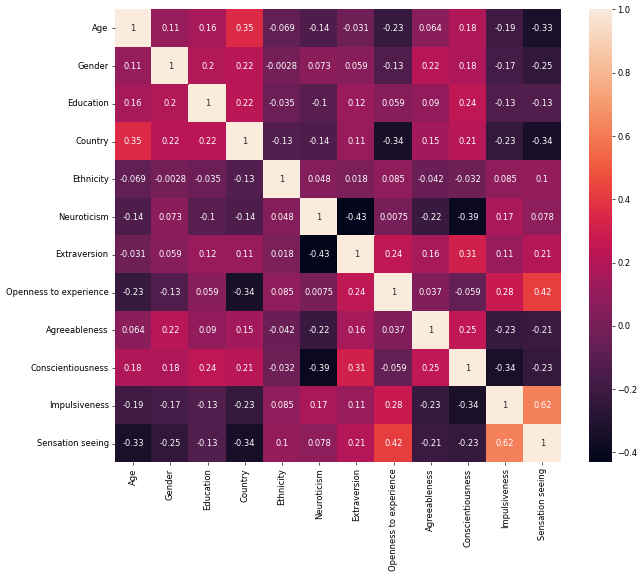

In [ ]:
plt.figure(figsize=(12, 10), dpi=60)
sns.heatmap(data[demographic_columns+personality_columns].corr(), annot = True)

### **Вывод**


Наблюдается умеренная корреляция между Impulsiveness и Sensation seeing. Между остальными признаками корреляции выше слабой (шкала Чеддока) не выявлено.

### **Multilabel binary classification**

Как и рекомендовано преобразуем в бинарную классификацию путем объединения части классов в один новый класс для каждого препарата.

CL0, CL1  - non-user(класс 0);

CL2, CL3, CL4, CL5, CL6 - user(класс 1).

In [ ]:
# объединение классов
dict_user = {'CL0':0, 'CL1':0, 'CL2':1, 'CL3':1, 'CL4':1, 'CL5':1, 'CL6':1}

for i in drugs_columns:
    data[i] = data[i].map(dict_user)
data.head()

,Age,Gender,Education,Country,Ethnicity,Neuroticism,Extraversion,Openness to experience,Agreeableness,Conscientiousness,Impulsiveness,Sensation seeing,Alcohol consumption,Amphetamines consumption,Amyl nitrite consumption,Benzodiazepine consumption,Caffeine consumption,Cannabis consumption,Chocolate consumption,Cocaine consumption,Crack consumption,Ecstasy consumption,Heroin consumption,Ketamine consumption,Legal highs consumption,Lysergic acid diethylamide consumption,Methadone consumption,Magic mushrooms consumption,Nicotine consumption,Volatile substance abuse consumption
0,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,0.49788,0.48246,-0.05921,0.96082,0.12600,0.31287,-0.57545,-0.58331,-0.91699,-0.00665,-0.21712,-1.18084,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,1,0
2,-0.07854,-0.48246,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,-0.14277,-0.71126,-0.21575,1,1,1,0,1,1,1,1,0,1,0,1,0,1,1,0,1,0
3,0.49788,-0.48246,-0.05921,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,-1.37983,0.40148,1,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0
4,-0.95197,0.48246,1.16365,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,0.58489,-1.37983,-1.18084,1,0,0,1,1,1,1,1,0,0,0,1,0,0,0,0,1,0
5,0.49788,0.48246,1.98437,0.96082,-0.31685,0.73545,-1.63340,-0.45174,-0.30172,1.30612,-0.21712,-0.21575,1,0,0,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0


## **Обработка категориальны признаков**

In [ ]:
age = [0 if a <= -0.9 else 
       1 if a >= -0.5 and a < 0 else 
       2 if a > 0 and a < 1 else 
       3 if a > 1 and a < 1.5 else 
       4 if a > 1.5 and a < 2 else 
       5 
       for a in data['Age']]

gender = [0 if g > 0 else 1 for g in data['Gender']]

education = [0 if e <-2 else 
             1 if e > -2 and e < -1.5 else 
             2 if e > -1.5 and e < -1.4 else 
             3 if e > -1.4 and e < -1 else 
             4 if e > -1 and e < -0.5 else 
             5 if e > -0.5 and e < 0 else 
             6 if e > 0 and e < 0.5 else 
             7 if e > 0.5 and e < 1.5 else 
             8 
             for e in data['Education']]

country = [0 if c < -0.5 else 
           1 if c > -0.5 and c < -0.4 else 
           2 if c > -0.4 and c < -0.2 else 
           3 if c > -0.2 and c < 0 else 
           4 if c > 0 and c < 0.23 else 
           5 if c > 0.23 and c < 0.9 else 
           6 
           for c in data['Country']]

ethnicity = [0 if e < -1 else 
             1 if e > -1 and e < -0.4 else 
             2 if e > -0.4 and e < -0.25 else 
             3 if e >= -0.25 and e < 0.11 else 
             4 if e > 0.12 and e < 1 else 
             5 if e > 1.9 else 
             6 
             for e in data['Ethnicity']]


data['Age'] = age
data['Gender'] = gender
data['Education'] = education
data['Country'] = country
data['Ethnicity'] = ethnicity

data.head()

,Age,Gender,Education,Country,Ethnicity,Neuroticism,Extraversion,Openness to experience,Agreeableness,Conscientiousness,Impulsiveness,Sensation seeing,Alcohol consumption,Amphetamines consumption,Amyl nitrite consumption,Benzodiazepine consumption,Caffeine consumption,Cannabis consumption,Chocolate consumption,Cocaine consumption,Crack consumption,Ecstasy consumption,Heroin consumption,Ketamine consumption,Legal highs consumption,Lysergic acid diethylamide consumption,Methadone consumption,Magic mushrooms consumption,Nicotine consumption,Volatile substance abuse consumption
0,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,2,0,5,6,4,0.31287,-0.57545,-0.58331,-0.91699,-0.00665,-0.21712,-1.18084,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,1,0
2,1,1,8,6,2,-0.67825,1.93886,1.43533,0.76096,-0.14277,-0.71126,-0.21575,1,1,1,0,1,1,1,1,0,1,0,1,0,1,1,0,1,0
3,2,1,5,6,2,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,-1.37983,0.40148,1,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0
4,0,0,7,6,2,-0.14882,-0.80615,-0.01928,0.59042,0.58489,-1.37983,-1.18084,1,0,0,1,1,1,1,1,0,0,0,1,0,0,0,0,1,0
5,2,0,8,6,2,0.73545,-1.63340,-0.45174,-0.30172,1.30612,-0.21712,-0.21575,1,0,0,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0


## **Деление выборки на обучающую и тестовую**

In [ ]:
# для деревянных моделей
X = data[demographic_columns + personality_columns]
y = data[drugs_columns]

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((1313, 12), (1313, 18), (564, 12), (564, 18))

In [ ]:
# для логистической регрессии
X = data[demographic_columns + personality_columns]
y = data[drugs_columns]

X = pd.get_dummies(X, columns=demographic_columns, drop_first=True)

x_train_lr, x_test_lr, y_train_lr, y_test_lr = train_test_split(X, y, test_size=0.3, random_state=42)
x_train_lr.shape, y_train_lr.shape, x_test_lr.shape, y_test_lr.shape

((1313, 33), (1313, 18), (564, 33), (564, 18))

## **Catboost**

In [ ]:
cat_clf = CatBoostClassifier(
    loss_function='Logloss',
    iterations=150, 

    cat_features = demographic_columns
)

multi_target_cat = MultiOutputClassifier(cat_clf, n_jobs=-1)

In [ ]:
# функция для кроссвалидация 

def crossval_kfold(model, name, x_train, y_train):
    k = 5
    kf = KFold(n_splits=k, random_state=42, shuffle=True)

 
    auc_score = []
 
    for train_index, valid_index in kf.split(x_train):
        train_x, valid_x = x_train.iloc[train_index,:], x_train.iloc[valid_index,:]
        train_y, valid_y = y_train.iloc[train_index] , y_train.iloc[valid_index]
     
        model.fit(train_x, train_y)
        pred_values = model.predict_proba(valid_x)

        auc_score_fold = []

        for i,j in enumerate(y_test.columns):
            probabilities_one_valid = pred_values[i][:, 1]
            predict_valid = probabilities_one_valid>0.5
            auc_roc = roc_auc_score(valid_y[j], probabilities_one_valid)
            auc_score_fold.append(auc_roc)
     
        auc_all = sum(auc_score_fold)/len(auc_score_fold)
        auc_score.append(round(auc_all,3))
     
    avg_auc_score = sum(auc_score)/k
 
    print(f'Среднее AUC {name} для каждого фолда  - {auc_score}')
    print(f'Общее среднее AUC {name}: {round(avg_auc_score,3)}')


In [ ]:
crossval_kfold(multi_target_cat, "Catboost", x_train, y_train)

Среднее AUC Catboost для каждого фолда  - [0.753, 0.752, 0.768, 0.802, 0.781]
Общее среднее AUC Catboost: 0.771


## **Логистическая регрессия**

In [ ]:
model_lr = LogisticRegression()
multi_target_lr = MultiOutputClassifier(model_lr, n_jobs=-1)

In [ ]:
%%time
# кроссвалидация 
crossval_kfold(multi_target_lr, "логистической регрессии", x_train_lr, y_train_lr)


Среднее AUC логистической регрессии для каждого фолда  - [0.743, 0.775, 0.766, 0.804, 0.801]
Общее среднее AUC логистической регрессии: 0.778
CPU times: user 760 ms, sys: 17.6 ms, total: 777 ms
Wall time: 2.61 s


## **Случайный лес**

In [ ]:
rf = RandomForestClassifier(random_state=0)
multi_target_rf = MultiOutputClassifier(rf, n_jobs=-1)

In [ ]:

# кроссвалидация 
crossval_kfold(multi_target_rf, "случайного леса", x_train, y_train)

Среднее AUC случайного леса для каждого фолда  - [0.747, 0.75, 0.753, 0.776, 0.799]
Общее среднее AUC случайного леса: 0.765


### **Вывод**

Модели логистической регрессии и бустинга показали близкие результаты. Но так как у бустинга больший потенциал для улучшения результатов после подбора гиперпараметров и отбора признаков, дальше работать будем с ним.

## **Feature importances Catboost**

Выведем важность признаков для каждого классификатора Catboost.

In [ ]:
data_importances = pd.DataFrame()

for i, estimator in enumerate(multi_target_cat.estimators_):
  importances = estimator.feature_importances_
  df_importances = pd.DataFrame(index=x_train.columns.to_list(), columns=['importance'], data=importances).sort_values(by='importance',ascending=False)

  data_importances[y_test.columns[i]] = df_importances.index
data_importances

,Alcohol consumption,Amphetamines consumption,Amyl nitrite consumption,Benzodiazepine consumption,Caffeine consumption,Cannabis consumption,Chocolate consumption,Cocaine consumption,Crack consumption,Ecstasy consumption,Heroin consumption,Ketamine consumption,Legal highs consumption,Lysergic acid diethylamide consumption,Methadone consumption,Magic mushrooms consumption,Nicotine consumption,Volatile substance abuse consumption
0,Sensation seeing,Country,Country,Country,Conscientiousness,Age,Neuroticism,Age,Country,Age,Country,Age,Age,Country,Country,Country,Age,Age
1,Conscientiousness,Age,Age,Neuroticism,Openness to experience,Country,Agreeableness,Sensation seeing,Impulsiveness,Sensation seeing,Neuroticism,Sensation seeing,Country,Age,Education,Age,Sensation seeing,Country
2,Openness to experience,Conscientiousness,Sensation seeing,Openness to experience,Neuroticism,Sensation seeing,Sensation seeing,Country,Gender,Country,Openness to experience,Openness to experience,Gender,Openness to experience,Openness to experience,Sensation seeing,Conscientiousness,Conscientiousness
3,Agreeableness,Sensation seeing,Conscientiousness,Conscientiousness,Extraversion,Openness to experience,Conscientiousness,Openness to experience,Sensation seeing,Conscientiousness,Sensation seeing,Conscientiousness,Sensation seeing,Sensation seeing,Age,Openness to experience,Country,Sensation seeing
4,Extraversion,Openness to experience,Gender,Education,Agreeableness,Conscientiousness,Openness to experience,Conscientiousness,Neuroticism,Openness to experience,Impulsiveness,Gender,Openness to experience,Gender,Neuroticism,Gender,Neuroticism,Neuroticism
5,Impulsiveness,Gender,Openness to experience,Gender,Sensation seeing,Agreeableness,Gender,Neuroticism,Education,Gender,Conscientiousness,Impulsiveness,Agreeableness,Conscientiousness,Agreeableness,Conscientiousness,Openness to experience,Extraversion
6,Neuroticism,Impulsiveness,Agreeableness,Sensation seeing,Education,Gender,Extraversion,Education,Openness to experience,Extraversion,Extraversion,Agreeableness,Conscientiousness,Neuroticism,Extraversion,Impulsiveness,Impulsiveness,Education
7,Gender,Neuroticism,Ethnicity,Age,Ethnicity,Impulsiveness,Impulsiveness,Agreeableness,Age,Agreeableness,Age,Neuroticism,Impulsiveness,Impulsiveness,Gender,Neuroticism,Agreeableness,Openness to experience
8,Ethnicity,Education,Neuroticism,Extraversion,Impulsiveness,Neuroticism,Ethnicity,Extraversion,Extraversion,Neuroticism,Agreeableness,Extraversion,Extraversion,Education,Conscientiousness,Extraversion,Gender,Impulsiveness
9,Age,Agreeableness,Extraversion,Agreeableness,Age,Extraversion,Age,Gender,Agreeableness,Impulsiveness,Gender,Country,Neuroticism,Agreeableness,Impulsiveness,Agreeableness,Education,Agreeableness


### **Вывод**

Как видим, для разных препаратов важность признаков распределена неодинаково.
На следующих этапах следует работать отдельно с классификатором для каждого препарата. Для каждого классификатора следует отобрать признаки, подобрать гиперпараметры(Gridsearch, optuna).

## **Catboost на тестовой выборке**

In [ ]:
%%time
# multi_target_cat.fit(x_train,y_train)
probabilities_test = multi_target_cat.predict_proba(x_test)

CPU times: user 35.5 ms, sys: 13.1 ms, total: 48.6 ms
Wall time: 45.6 ms


In [ ]:
# среднее значение AUC
auc_score = []
for i,j in enumerate(y_test.columns):
    probabilities_one_test = probabilities_test[i][:, 1]
    predict_test = probabilities_one_test>0.5
    auc_roc = roc_auc_score(y_test[j], probabilities_one_test)
    auc_score.append(auc_roc)

print(f'Среднее AUC Catboost на тестовой выборке - {round(np.mean(auc_score),3)}')

Среднее AUC Catboost на тестовой выборке - 0.757


### **ROC_AUC и матрица неточностей для каждого препарата**

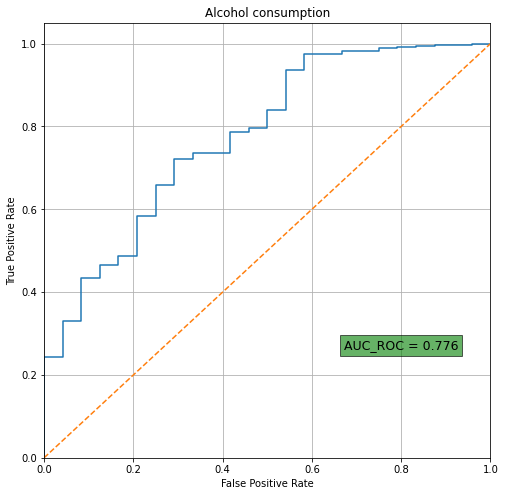

,predicted 0,predicted 1
actual 0,0,24
actual 1,0,540


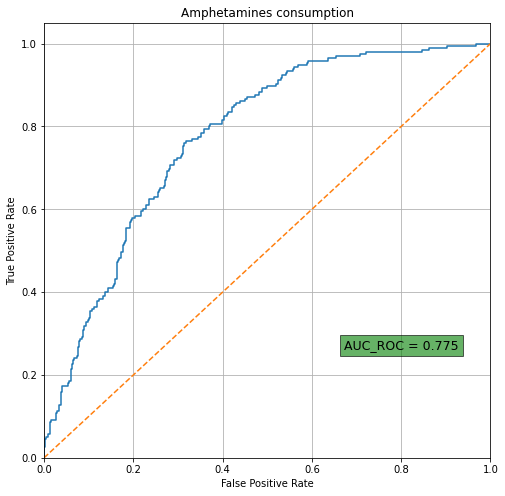

,predicted 0,predicted 1
actual 0,298,71
actual 1,87,108


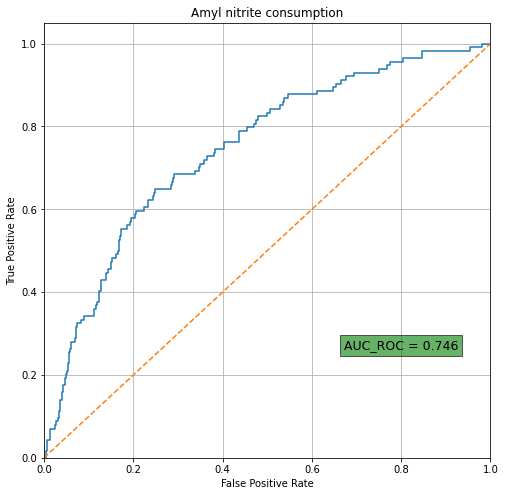

,predicted 0,predicted 1
actual 0,444,6
actual 1,106,8


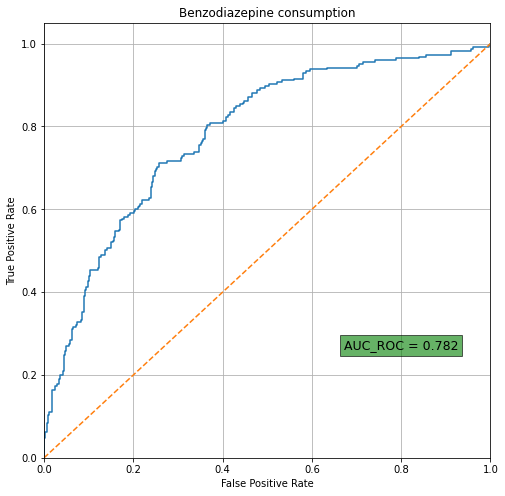

,predicted 0,predicted 1
actual 0,286,53
actual 1,105,120


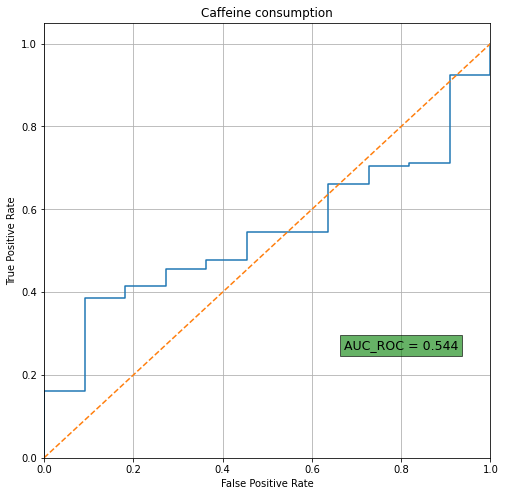

,predicted 0,predicted 1
actual 0,0,11
actual 1,0,553


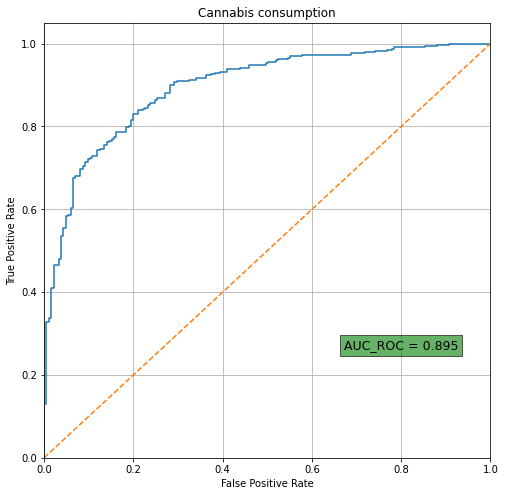

,predicted 0,predicted 1
actual 0,133,52
actual 1,38,341


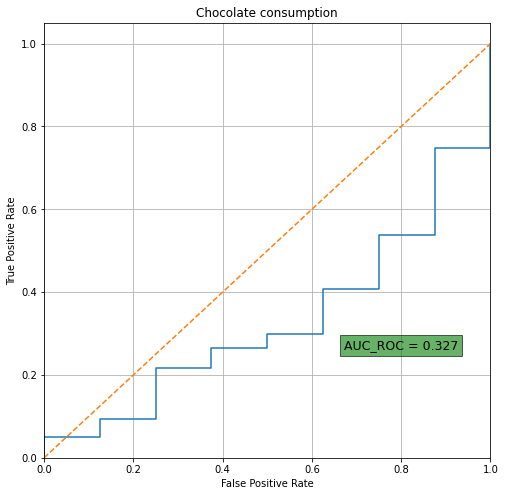

,predicted 0,predicted 1
actual 0,0,8
actual 1,0,556


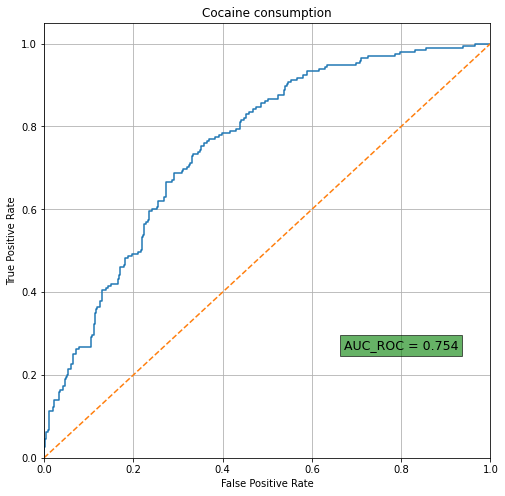

,predicted 0,predicted 1
actual 0,297,72
actual 1,100,95


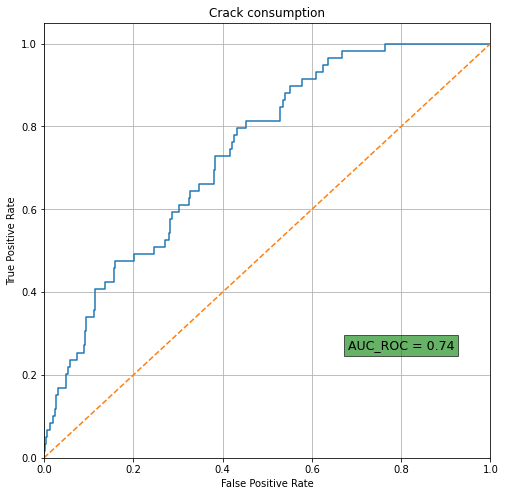

,predicted 0,predicted 1
actual 0,504,1
actual 1,58,1


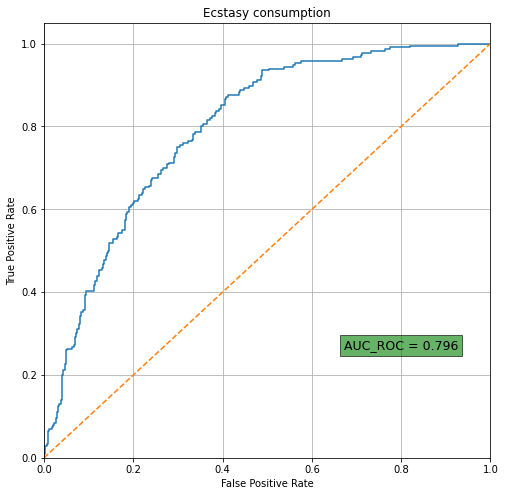

,predicted 0,predicted 1
actual 0,265,83
actual 1,73,143


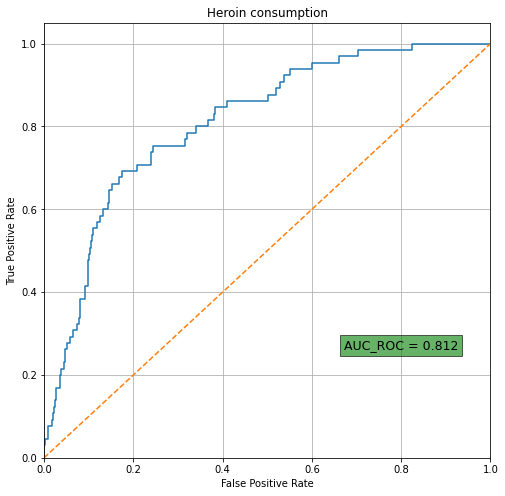

,predicted 0,predicted 1
actual 0,499,0
actual 1,63,2


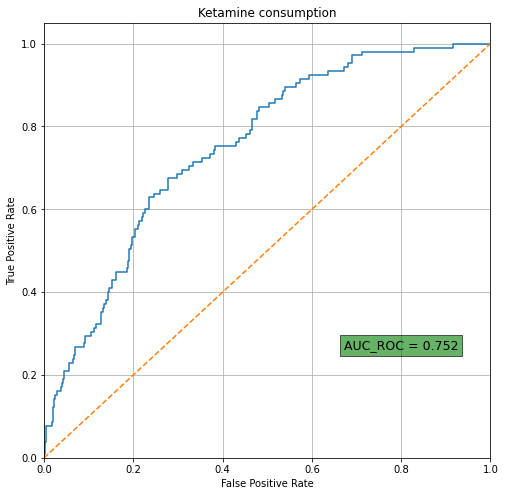

,predicted 0,predicted 1
actual 0,458,1
actual 1,103,2


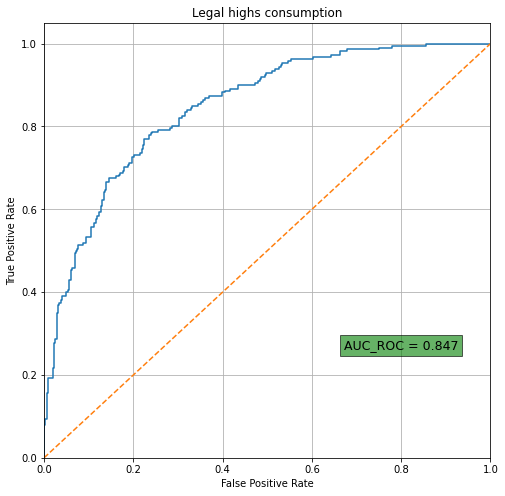

,predicted 0,predicted 1
actual 0,282,70
actual 1,58,154


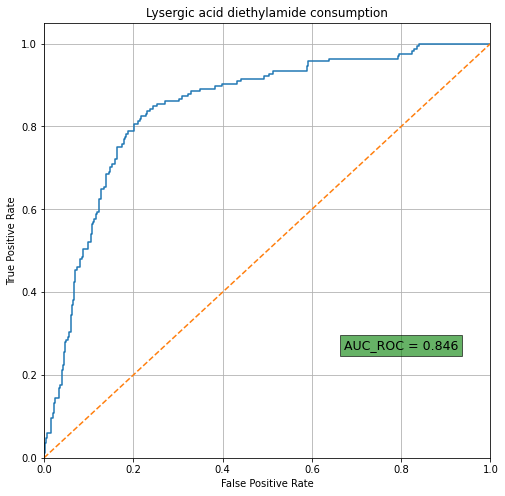

,predicted 0,predicted 1
actual 0,345,54
actual 1,57,108


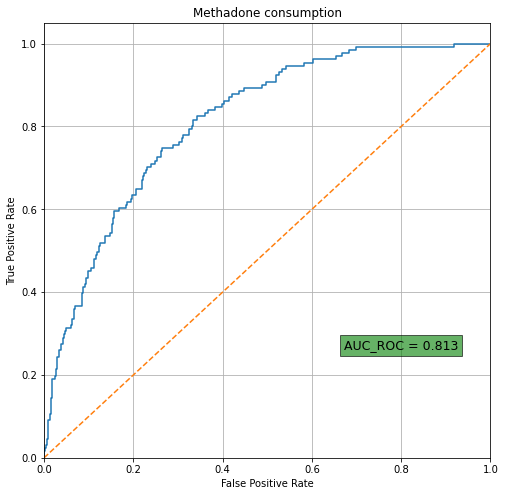

,predicted 0,predicted 1
actual 0,391,42
actual 1,74,57


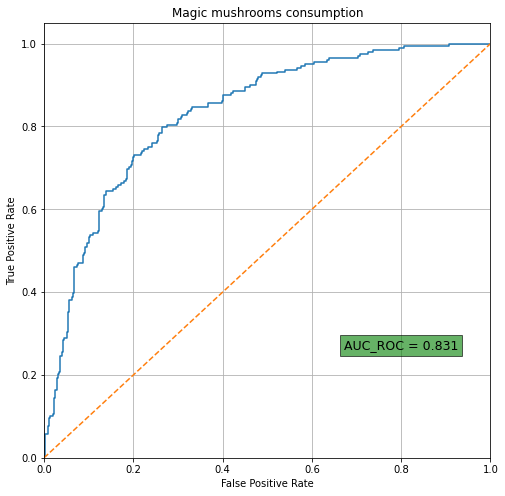

,predicted 0,predicted 1
actual 0,290,66
actual 1,64,144


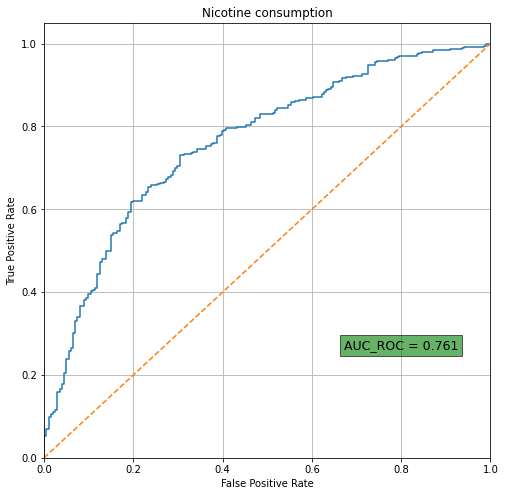

,predicted 0,predicted 1
actual 0,80,121
actual 1,47,316


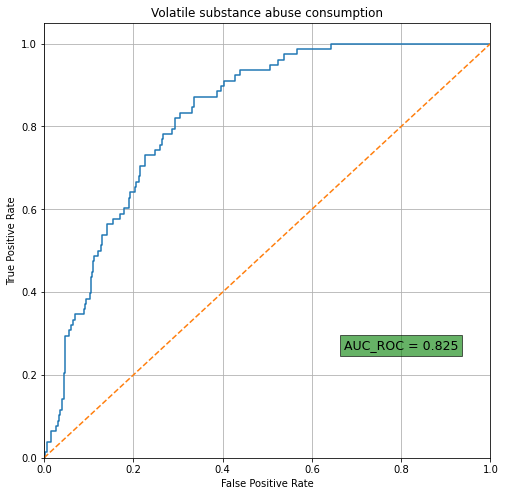

,predicted 0,predicted 1
actual 0,483,3
actual 1,76,2


In [ ]:
 
for i,j in enumerate(y_test.columns):
    probabilities_one_test = probabilities_test[i][:, 1]
    predict_test = probabilities_one_test>0.5
    #roc-кривая
    fpr, tpr, thresholds = roc_curve(y_test[j], probabilities_one_test)
    auc_roc = roc_auc_score(y_test[j], probabilities_one_test)
    graph(fpr,tpr,auc_roc, j)
    # матрица ошибок
    conf_matrix(y_test[j], predict_test)

### **Задание №4**. Предположим, что мы построили рекомендательную систему, и ожидаем, что средний чек клиента вследствие этого должен вырасти. Мы провели AB-тест и собрали данные по контрольной и тестовой группе. Предложите и проведите статистический тест, который можно применить к этим данным.

В процессе выполнения задания разрешено пользоваться библиотеками scipy и statsmodels.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Сгенерируем данные для задачи
control = np.random.lognormal(mean=5, sigma=2, size=(100000,))
test = np.random.lognormal(mean=5.04, sigma=2, size=(100000,))

In [ ]:
# <YOUR_CODE_HERE>

# распределения не являются нормальными
# проверим гипотезу о равенстве средних двух выборок, проведем тест Манна-Уитни,
# используя метод scipy.stats.mannwhitneyu, параметром alternative='less' зададим одностороннюю альтернативную гипотезу 
# нулевая гипотеза заключается в том, что нет различий между распределениями выборок данных
# примем критический уровень статистической значимости равный 0.05

from scipy.stats import mannwhitneyu

stat, p = mannwhitneyu(control, test, alternative='less')

alpha = 0.05
if p > alpha:
	print("Не получилось отвергнуть нулевую гипотезу")
else:
	print("Отвергаем нулевую гипотезу")


Отвергаем нулевую гипотезу


То есть обнаружили статистически значимые отличия между выборками

### **Задание №4 (*)**. В прошлом задании мы улавливали статистически значимое различие в средних в 0.04 единицы на выборке из 100000 клиентов. Насколько больше нам требуется собрать клиентов, чтобы уловить различие в 0.02?

Так как в методе np.random.lognormal параметры mean и sigma являются значениями не самого распределения, а лежащего в его основе нормального распределения, из которого оно получено, то для определения необходимого размера выборки воспользуемся формулой: 

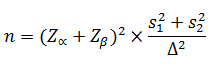

где $Z_α$ и $Z_β$ - критические значения нормального стандартного распределения для заданных α и β, определяются по таблицам. Примем $Z_α$ - 1.645 (уровень значимости 0.95 для одностороннего теста), $Z_β$ - 0.842 (мощность 0.8 для одностороннего теста).

In [ ]:
# <YOUR_CODE_HERE>
z_a = 1.645
z_b = 0.842
s = 2
t = 0.02

def quantity(z_a, z_b, s, t):
  n = (((z_a + z_b)**2)*2*s**2)/(t**2)
  return n

print(f'Чтобы уловить различие в 0.02, нужно увеличить кол-во клиентов в каждой группе на {round(quantity(z_a, z_b, s, t)-100000)}')


Чтобы уловить различие в 0.02, нужно увеличить кол-во клиентов в каждой группе на 23703
